In [15]:
import pandas as pd

df = pd.read_json('aspen.json')

df

,stars,hotel,title,content
0,5,[Limelight Hotel],[Awesome visit ],[Went on a girls trip this past weekend. We ha...
1,5,[Limelight Hotel],[Super hotel and Super Staff],[We were very lucky to win 4 nights accomodati...
2,5,[Chateau Roaring Fork],[Wait until the last minute],[Wait until the last minute and get a lodging/...
3,5,[Limelight Hotel],[Great Hotel. Nice place to stay],[Great hotel. Beautiful. Great well decorated ...
4,3,[Aspen Mountain Lodge],[Quaint and cozy lodge],"[Great value, decent location. I'd highly reco..."
...,...,...,...,...
2001,5,[Chateau Blanc],[Great stay],[Spent a couple of nights in Aspen on a girls ...
2002,4,[Chateau Blanc],[Excellent cost/benefit],[We stayed in a two bedrooms/bathrooms apartme...
2003,5,[Chateau Blanc],[Great WInter Vaca],[A wonderful place to stay for our family vaca...
2004,5,[Chateau Blanc],[Chateau Blanc for a week],[The lodge is few blocks away from the main do...


In [16]:
import pandas as pd

# Assuming you have the DataFrame df with columns 'stars', 'hotel', 'title', and 'content'

# Define a function to categorize stars
def categorize_stars(stars):
    if stars in [ 5]:
        return 1
    elif stars in [1, 2,3,4]:
        return 0
    else:
        return 'Unknown'

# Read your DataFrame from the provided data
# df = pd.read_csv('your_data.csv')  # Uncomment and replace 'your_data.csv' with your file path if you're reading from a CSV file

# Apply the categorize_stars function to the 'stars' column and create a new column 'rating'
df['rating'] = df['stars'].apply(categorize_stars)
df

,stars,hotel,title,content,rating
0,5,[Limelight Hotel],[Awesome visit ],[Went on a girls trip this past weekend. We ha...,1
1,5,[Limelight Hotel],[Super hotel and Super Staff],[We were very lucky to win 4 nights accomodati...,1
2,5,[Chateau Roaring Fork],[Wait until the last minute],[Wait until the last minute and get a lodging/...,1
3,5,[Limelight Hotel],[Great Hotel. Nice place to stay],[Great hotel. Beautiful. Great well decorated ...,1
4,3,[Aspen Mountain Lodge],[Quaint and cozy lodge],"[Great value, decent location. I'd highly reco...",0
...,...,...,...,...,...
2001,5,[Chateau Blanc],[Great stay],[Spent a couple of nights in Aspen on a girls ...,1
2002,4,[Chateau Blanc],[Excellent cost/benefit],[We stayed in a two bedrooms/bathrooms apartme...,0
2003,5,[Chateau Blanc],[Great WInter Vaca],[A wonderful place to stay for our family vaca...,1
2004,5,[Chateau Blanc],[Chateau Blanc for a week],[The lodge is few blocks away from the main do...,1


In [17]:
import os
import sys
import numpy as np


#pre-processing of text
import string
import re


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [18]:
def clean_text(str_list, lemmatize=True):
    clean_list = []
    
    for text in str_list:
        # Remove pound sign from hashtags
        text = re.sub(r'#', '', text)
        words = word_tokenize(text)
        clean_words = []
        
        lemmatizer = WordNetLemmatizer()  # Move lemmatizer initialization outside the loop
        
        for word in words:
            # Drop words with fewer than 2 characters and drop any punctuation "words"
            if len(word) > 1 and re.match(r'^\w+$', word):
                if lemmatize:
                    word = lemmatizer.lemmatize(word)  # Apply lemmatization
                clean_words.append(word)
        
        clean_text = ' '.join(clean_words)
        clean_list.append(clean_text)
    
    return clean_list

In [19]:
df['content'] = df['content'].astype(str)
df['clean_text']= clean_text(df['content'])
df['clean_text']= df['clean_text'].str.lower()
df

,stars,hotel,title,content,rating,clean_text
0,5,[Limelight Hotel],[Awesome visit ],['Went on a girls trip this past weekend. We h...,1,on girl trip this past weekend we had wonderfu...
1,5,[Limelight Hotel],[Super hotel and Super Staff],['We were very lucky to win 4 nights accomodat...,1,were very lucky to win night accomodation at t...
2,5,[Chateau Roaring Fork],[Wait until the last minute],"[""Wait until the last minute and get a lodging...",1,wait until the last minute and get ticket pack...
3,5,[Limelight Hotel],[Great Hotel. Nice place to stay],['Great hotel. Beautiful. Great well decorated...,1,hotel beautiful great well decorated bar and n...
4,3,[Aspen Mountain Lodge],[Quaint and cozy lodge],"[""Great value, decent location. I'd highly rec...",0,great value decent location highly recommend r...
...,...,...,...,...,...,...
2001,5,[Chateau Blanc],[Great stay],['Spent a couple of nights in Aspen on a girls...,1,couple of night in aspen on girl getaway our t...
2002,4,[Chateau Blanc],[Excellent cost/benefit],['We stayed in a two bedrooms/bathrooms apartm...,0,stayed in two apartment the apartment had pret...
2003,5,[Chateau Blanc],[Great WInter Vaca],['A wonderful place to stay for our family vac...,1,wonderful place to stay for our family vacatio...
2004,5,[Chateau Blanc],[Chateau Blanc for a week],"[""The lodge is few blocks away from the main d...",1,the lodge is few block away from the main down...


In [37]:
df['stars'].value_counts(normalize = True)

stars
5    0.651545
4    0.222333
3    0.063310
1    0.034397
2    0.028415
Name: proportion, dtype: float64

In [38]:
df['hotel'].value_counts(normalize = True)

hotel
[Mountain Chalet Aspen]                              0.089731
[Aspen Square Condominium Hotel]                     0.082253
[The St. Regis Aspen Resort]                         0.082253
[Hotel Jerome]                                       0.082253
[Tyrolean Lodge]                                     0.080758
[Molly Gibson Lodge]                                 0.072283
[Aspen Mountain Lodge]                               0.039880
[Hotel Durant]                                       0.039880
[The Little Nell]                                    0.029910
[Lift One Condominiums]                              0.029910
[Snow Queen Lodge]                                   0.029412
[Residences at The Little Nell]                      0.027916
[Aspen Alps Condominium Resort]                      0.027418
[The Residence Hotel]                                0.022433
[Hyatt Residence Club Grand Aspen]                   0.022433
[Difficult Campground]                               0.021436
[A

In [20]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [21]:
# check class distribution
df['rating'].value_counts(normalize = True)

rating
1    0.651545
0    0.348455
Name: proportion, dtype: float64

In [22]:
# split train dataset into train, validation and test sets
train_text, temp_text, train_labels, temp_labels = train_test_split(df['clean_text'], df['rating'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['rating'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [23]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

<AxesSubplot: >

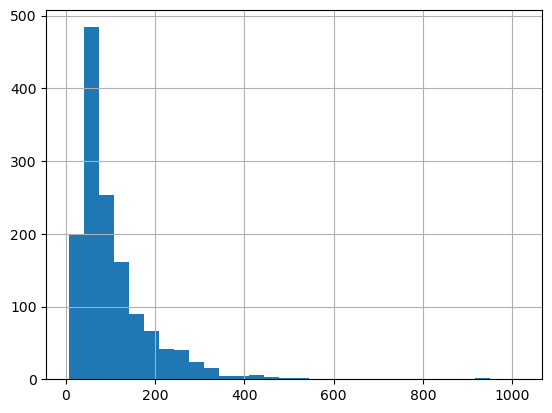

In [24]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [25]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

/opt/anaconda3/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2688: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [26]:
train_seq = torch.tensor(tokens_train ['input_ids'])
train_mask = torch.tensor(tokens_train ['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val ['input_ids'])
val_mask = torch.tensor(tokens_val ['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test ['input_ids'])
test_mask = torch.tensor(tokens_test ['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [27]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [28]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [29]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()
        
        self.bert = bert 
        
        # dropout layer
        self.dropout = nn.Dropout(0.1)
      
        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)
      
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):
        
        #pass the inputs to the model  
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      
        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)
      
        # apply softmax activation
        x = self.softmax(x)
        
        return x

In [30]:
# Set the device to CPU
device = torch.device('cpu')

# Pass the pre-trained BERT to our defined architecture
model = BERT_Arch(bert)

# Push the model to CPU
model = model.to(device)

In [31]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

#The compute_class_weight function from the sklearn.utils.class_weight module 
#is used to compute the class weights with multiple parameters for the training labels.

from sklearn.utils.class_weight import compute_class_weight

# Compute the class weights
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)

print("Class Weights:", class_weights)

/opt/anaconda3/lib/python3.8/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Class Weights: [1.43558282 0.76721311]


In [32]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# define the loss function
cross_entropy  = nn.NLLLoss(weights) 

# number of training epochs
epochs = 10

In [33]:
# function to train the model
def train():
    
    model.train()
    total_loss, total_accuracy = 0, 0
  
    # empty list to save model predictions
    total_preds=[]
  
    # iterate over batches
    for step,batch in enumerate(train_dataloader):
        
        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
        
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
 
        sent_id, mask, labels = batch
        
        # clear previously calculated gradients 
        model.zero_grad()        

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)
  
      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [34]:
# function for evaluating the model
def evaluate():
    
    print("\nEvaluating...")
  
    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0
    
    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):
        
        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():
            
            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader) 

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [35]:
# set initial loss to infinite
best_valid_loss = float('inf')

#defining epochs
epochs = 3

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 3

Evaluating...

Training Loss: 0.695
Validation Loss: 0.692

 Epoch 2 / 3

Evaluating...

Training Loss: 0.695
Validation Loss: 0.690

 Epoch 3 / 3

Evaluating...

Training Loss: 0.693
Validation Loss: 0.689


In [36]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()


# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.33      0.12      0.18       105
           1       0.65      0.86      0.74       196

    accuracy                           0.60       301
   macro avg       0.49      0.49      0.46       301
weighted avg       0.54      0.60      0.54       301

